# Hands On Session Machine Learning - Logistic Regression 

In this project we will be working with a <span class="girk">**fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement.**</span> We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* **'Daily Time Spent on Site'**: consumer time on site in minutes
* **'Age'**: cutomer age in years
* **'Area Income'**: Avg. Income of geographical area of consumer
* **'Daily Internet Usage'**: Avg. minutes a day consumer is on the internet
* **'Ad Topic Line'**: Headline of the advertisement
* **'City'**: City of consumer
* **'Male'**: Whether or not consumer was male
* **'Country'**: Country of consumer
* **'Timestamp'**: Time at which consumer clicked on Ad or closed window
* **'Clicked on Ad'**: 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

![](https://media.giphy.com/media/3oKHW8JB6ItMjIqXcs/giphy.gif)

In [ ]:
!pip install -r requirements.txt

In [ ]:
from IPython.display import HTML
display(HTML('''<style>[data-mime-type="application/vnd.jupyter.stdout"] pre { font-size:20px}</style>'''))
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd  # Import pandas to import csv as dataframe.
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 3px  black solid !important;
  color: black !important;
}
# For having gridlines

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [38]:
ad_data = pd.read_csv("advertising.csv")

**Check the head of ad_data**

In [ ]:
ad_data.head()

In [40]:
# DO NOT RUN THIS. THIS IS EXPECTED OUTPUT. DOWNLOAD A NEW COPY IF YOU ERASE THIS BY MISTAKE.

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


**Use info and describe() on ad_data to see the nature of data.**

In [ ]:
ad_data.info()

In [41]:
# DO NOT RUN THIS IS EXPECTED OUTPUT. DOWNLOAD A NEW COPY IF YOU ERASE THIS BY MISTAKE.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
ad_data.describe()

In [42]:
# DO NOT RUN THIS. THIS IS EXPECTED OUTPUT. DOWNLOAD A NEW COPY IF YOU ERASE THIS BY MISTAKE.

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

**Create a histogram of the Age**

In [ ]:
sns.set_style('whitegrid')
ad_data['Age'].hist(bins=30)
plt.xlabel("Age")

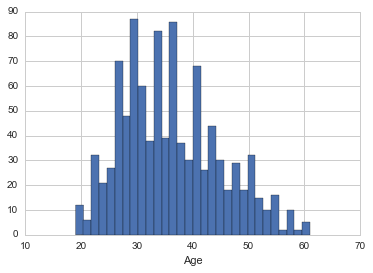

In [48]:
# DO NOT RUN THIS. THIS IS EXPECTED OUTPUT. DOWNLOAD A NEW COPY IF YOU ERASE THIS BY MISTAKE.

**Create a jointplot showing Area Income versus Age.**

In [ ]:
sns.jointplot(x='Age',y='Area Income',data=ad_data)

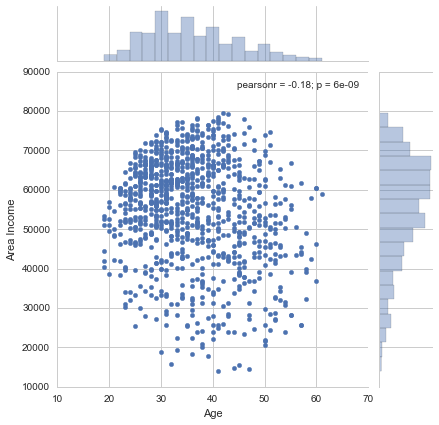

In [64]:
# DO NOT RUN THIS. THIS IS EXPECTED OUTPUT. DOWNLOAD A NEW COPY IF YOU ERASE THIS BY MISTAKE.

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

In [ ]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,color='red',kind='kde')

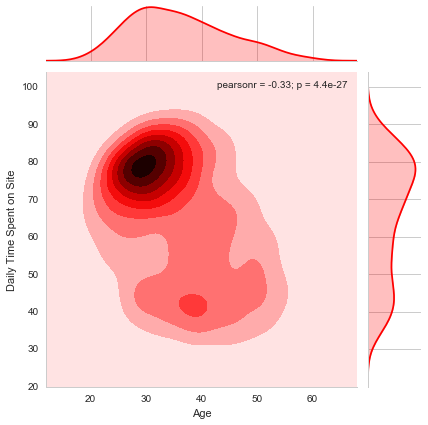

In [66]:
# DO NOT RUN THIS. THIS IS EXPECTED OUTPUT. DOWNLOAD A NEW COPY IF YOU ERASE THIS BY MISTAKE.

**Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

In [ ]:
sns.jointplot(x="Daily Time Spent on Site",y="Daily Internet Usage",data=ad_data,color='green')

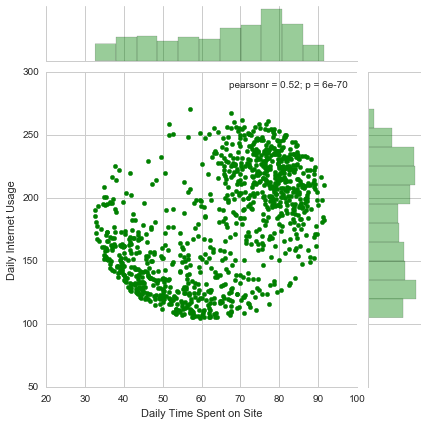

In [72]:
# DO NOT RUN THIS. THIS IS EXPECTED OUTPUT. DOWNLOAD A NEW COPY IF YOU ERASE THIS BY MISTAKE.

# **Any Questions ?**
![](https://media.giphy.com/media/xT5LMB2WiOdjpB7K4o/giphy.gif)

# Let the ML Games Begin!

![](https://media.giphy.com/media/gutZ5Pm6Xl62eIf5RZ/giphy.gif)

## Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

**Split the data into training set and testing set using train_test_split**

In [ ]:
ad_data.head()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad'] # Target Variable all the X params will be used to predict y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state = 42)

In [ ]:
X_train.head()

In [ ]:
y_train.head()

- Split into 4 separate sections X_train, X_test, y_train, y_test with test_size of 0.33 meaning training size = 0.67 or 67% of all the entries, random_state set to 42 so that you have the same results. More on this [here](https://www.kaggle.com/questions-and-answers/49890)

## **Train and fit a logistic regression model on the training set.**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression() # Create an instance of the model

In [ ]:
logmodel.fit(X_train,y_train)

In [92]:
# DO NOT RUN THIS. THIS IS EXPECTED OUTPUT. DOWNLOAD A NEW COPY IF YOU ERASE THIS BY MISTAKE.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# A Brief About Accuracy Metrics

- It is important to assess your model's performance because what good is machine learning if your results aren't accurate. We have confusion matrix to assess the performance.

## What is a Confusion Matrix ?

- A confusion matrix, also known as an error matrix, is a summarized table used to assess the performance of a classification model. The number of correct and incorrect predictions are summarized with count values and broken down by each class.

- So what exactly are classes ? Well a picture is worth a 1000 words, so I will let the image do the talking.

![](https://i.imgur.com/r5dT9aq.png)

## **Different Terms in Confusion Matrix and their meaning:**

- **Positive (P)**: Observation is positive (eg. is a dog).
- **Negative (N)**: Observation is not positive (eg. is not a dog).
- **True Positive (TP)**: Outcome where the model correctly predicts the positive class. (e.g. Predicted Dog as a Dog.)
- **True Negative (TN)**: Outcome where the model correctly predicts the negative class. (e.g. Predicted not a dog as not a dog.)
- **False Positive (FP)**: Also called a type 1 error, an outcome where the model incorrectly predicts the positive class when it is actually negative. (Predicted positive class i.e. predicted something as dog, in reality it is negative i.e. not a dog.)
- **False Negative (FN)**: Also called a type 2 error, an outcome where the model incorrectly predicts the negative class when it is actually positive. (Predicted something as not a dog, when it is actually positive is a dog.)



### Confusion Matrix Metrics


####  
![](https://i.imgur.com/nAO0v7M.png)

####  
![](https://i.imgur.com/JIyhYWm.png)

#### 
![](https://i.imgur.com/vDBzYd0.png)

#### 
![](https://i.imgur.com/KtdVxft.png)

#### 
![](https://i.imgur.com/Qbhigvp.png)

# Getting Errors ? Any Doubts ?

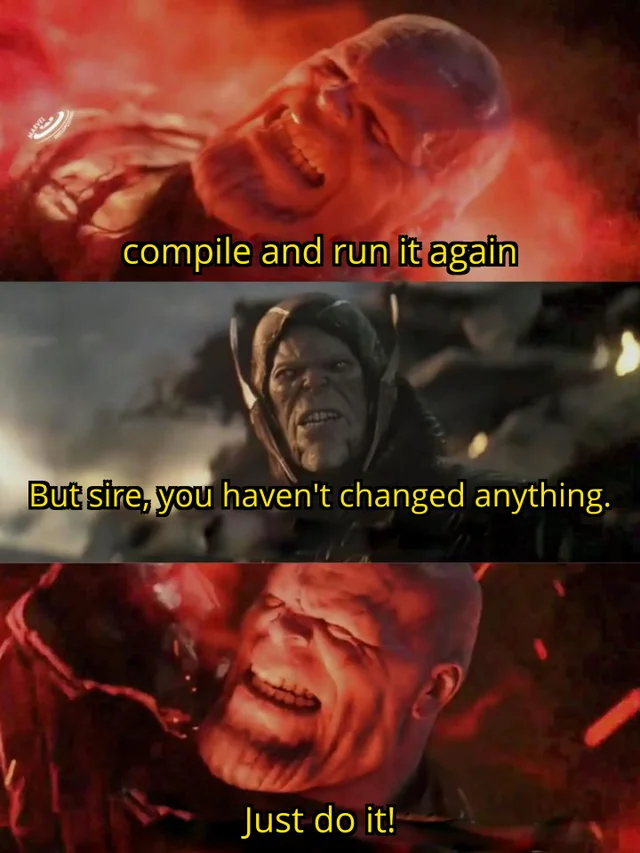

## Predictions and Evaluations
**Now predict values for the testing data.**

In [ ]:
predictions = logmodel.predict(X_test)

## **Create a classification report for the model.**

In [ ]:
# Print Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

In [51]:
# DO NOT RUN THIS. THIS IS EXPECTED OUTPUT. DOWNLOAD A NEW COPY IF YOU ERASE THIS BY MISTAKE.

array([[156,   6],
       [ 25, 143]], dtype=int64)

- For e.g. as recall score is what proportion of actual positives were identified accurately you'd get following: TP/TP+FN = 156/156+25 = 0.87 and for negative classes it would be what percentage of negatives were accurately identified i.e. TN/TN+FP = 143/143+6 = 0.96 and that is same as what we are getting for classes 0 and 1's recall score.

- In a similar way you can calculate f1 and precision based on confusion matrix, or you can have classification_report from sklearn.metrics to do it for you.

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

In [96]:
# DO NOT RUN THIS. THIS IS EXPECTED OUTPUT. DOWNLOAD A NEW COPY IF YOU ERASE THIS BY MISTAKE.

             precision    recall  f1-score   support

          0       0.87      0.96      0.91       162
          1       0.96      0.86      0.91       168

avg / total       0.91      0.91      0.91       330



## Great Job! 📊🎯

> You just saw the entire Machine Learning flow from exploratory data analysis, train test split of data, selecting a ML algorithm (Logistic Regression in our case), fitting the model, getting the prediction results and assessing it with the help of accuracy metrics. Feel free to try it on your own now ✨✨

![](https://media.giphy.com/media/QXPfCbIa2VLI5lbzEP/giphy.gif)

![](https://media.giphy.com/media/HXF45CT8cvzZC/giphy.gif)